In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/city_temperature.csv')
df.head()

c:\users\sumit\pycharmprojects\pythonlearning\venv\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [3]:
df.isna().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [4]:
df.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


In [5]:
df['Year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020,  201,  200], dtype=int64)

### Remove the "State" Column
* The State column has approx 50% null values
* There are two errors: 200 & 201, which may be 2000 & 2010 respectively.
* Convert Temperature from Farenheit to Celsius

In [6]:
df = df.drop("State",axis=1)
df.loc[df['Year']==200,'Year'] = 2000
df.loc[df['Year']==201,'Year'] = 2010
df['AvgTemperature'] = df['AvgTemperature'].apply(lambda x: ((x-32) * 5/9))
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,17.888889
1,Africa,Algeria,Algiers,1,2,1995,9.666667
2,Africa,Algeria,Algiers,1,3,1995,9.333333
3,Africa,Algeria,Algiers,1,4,1995,8.000000
4,Africa,Algeria,Algiers,1,5,1995,8.833333


### EDA

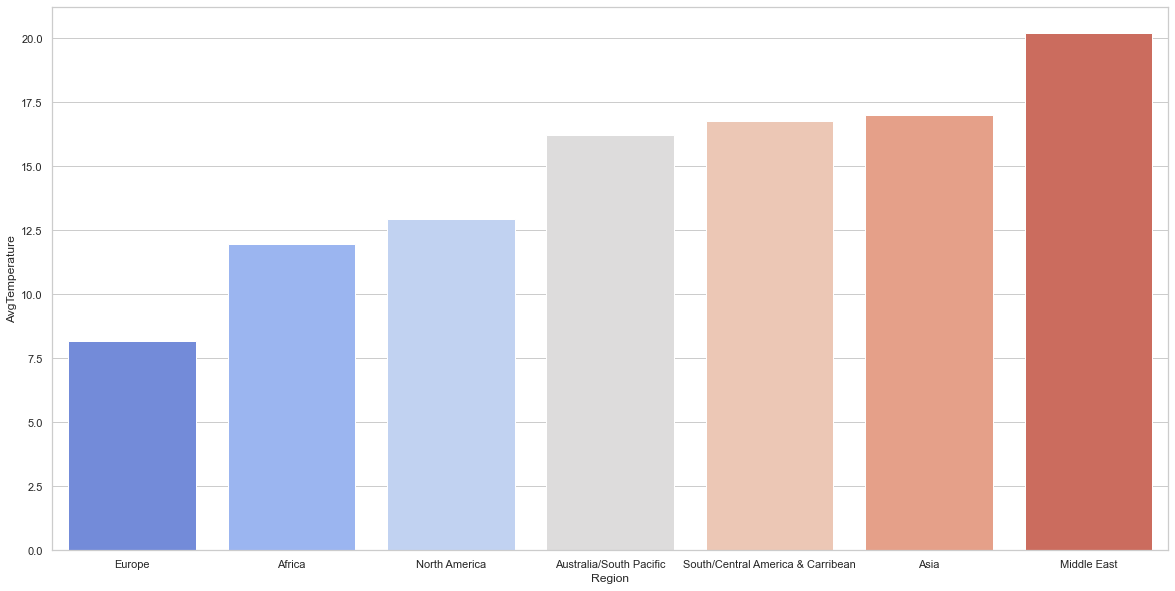

In [56]:
sns.set(style='whitegrid',rc={'figure.figsize':(20,10)})
regions = df.groupby(["Region"])["AvgTemperature"].mean().reset_index()\
    .sort_values(by='AvgTemperature',ascending=True)
ax = sns.barplot(x=regions.Region,y=regions.AvgTemperature,palette='coolwarm')
plt.show()